In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset (replace with your actual path)
file_path = "/home/afsha/Desktop/MP/PDAnalysisDataset/parkinsons_disease_data.csv"
df = pd.read_csv(file_path)

# Basic Overview
print("Shape of Dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())

Shape of Dataset: (2105, 34)

Column Names:
 Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

First 5 Rows:
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52    

In [2]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation          

In [3]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
          PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2105.000000  2105.000000  2105.000000  2105.000000     2105.000000   
mean   4110.000000    69.601900     0.492637     0.692637        1.337292   
std     607.805479    11.594511     0.500065     1.003827        0.895840   
min    3058.000000    50.000000     0.000000     0.000000        0.000000   
25%    3584.000000    60.000000     0.000000     0.000000        1.000000   
50%    4110.000000    70.000000     0.000000     0.000000        1.000000   
75%    4636.000000    80.000000     1.000000     1.000000        2.000000   
max    5162.000000    89.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2105.000000  2105.000000         2105.000000       2105.000000   
mean     27.209493     0.296437           10.040413          5.016674   
std       7.208099     0.456795            5.687014          2.89

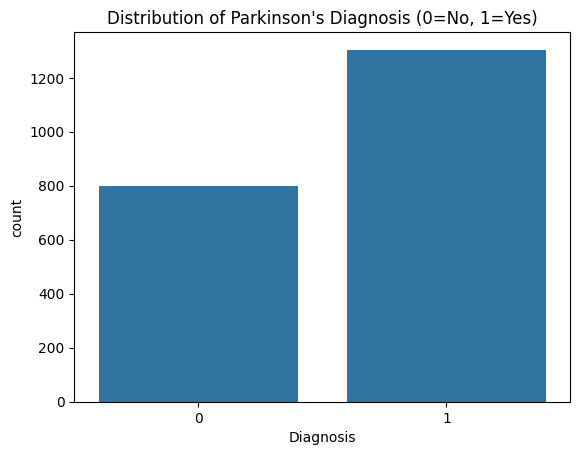

In [4]:
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Parkinson's Diagnosis (0=No, 1=Yes)")
plt.show()

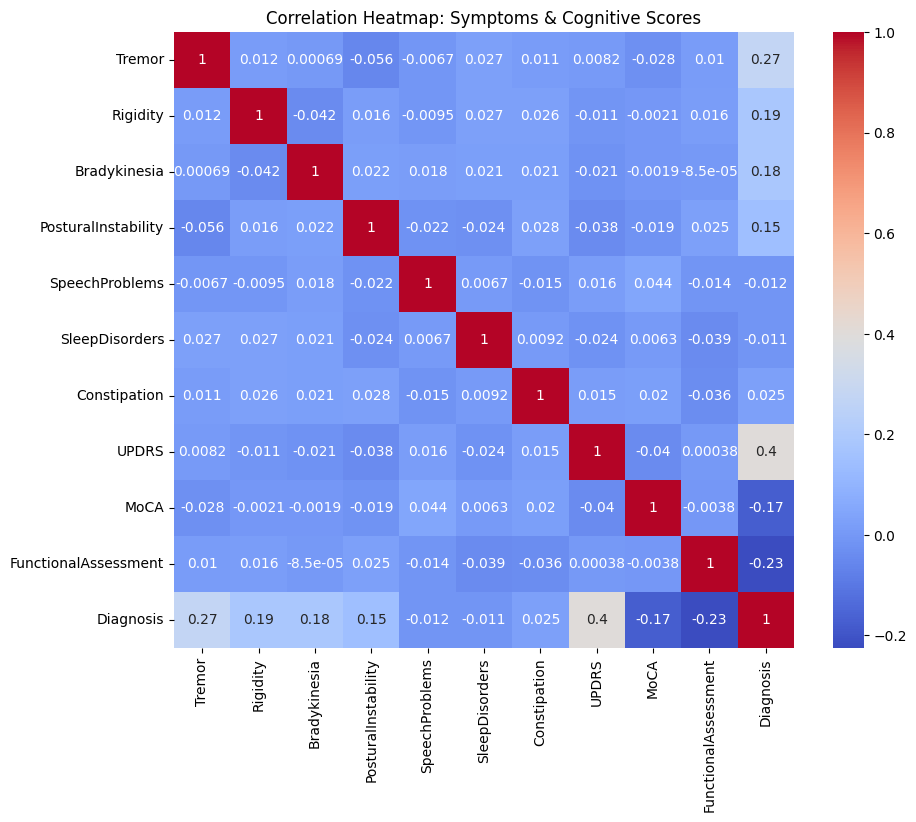

In [5]:
# Heatmap 1 → Symptoms & Cognitive Scores
symptom_features = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
                    'SpeechProblems', 'SleepDisorders', 'Constipation',
                    'UPDRS', 'MoCA', 'FunctionalAssessment', 'Diagnosis']

plt.figure(figsize=(10,8))
sns.heatmap(df[symptom_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Symptoms & Cognitive Scores")
plt.show()

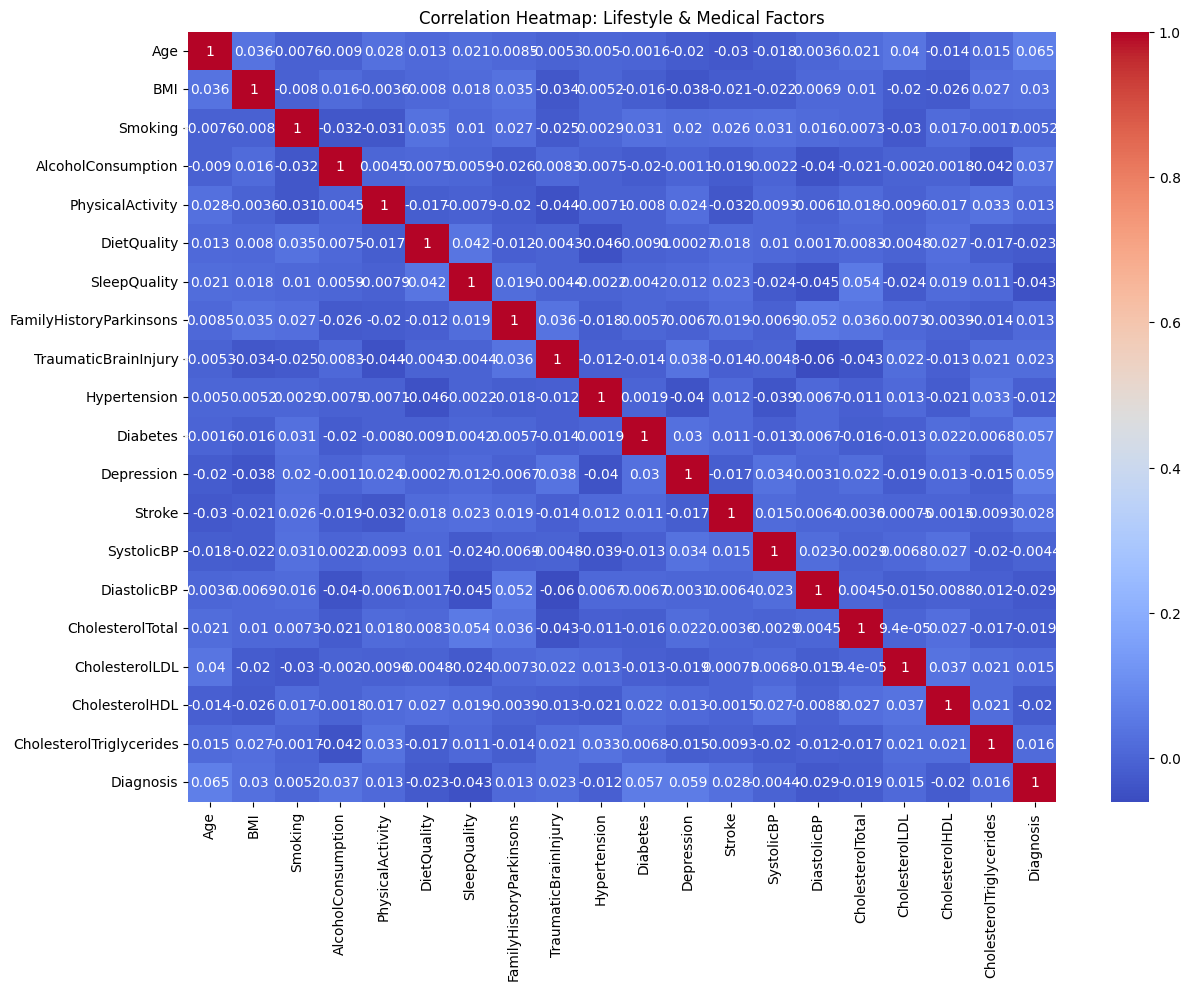

In [6]:
# Heatmap 2 → Medical & Lifestyle Factors
medical_features = ['Age', 'BMI', 'Smoking', 'AlcoholConsumption',
                    'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
                    'Hypertension', 'Diabetes', 'Depression', 'Stroke',
                    'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                    'Diagnosis']

plt.figure(figsize=(14,10))
sns.heatmap(df[medical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Lifestyle & Medical Factors")
plt.show()

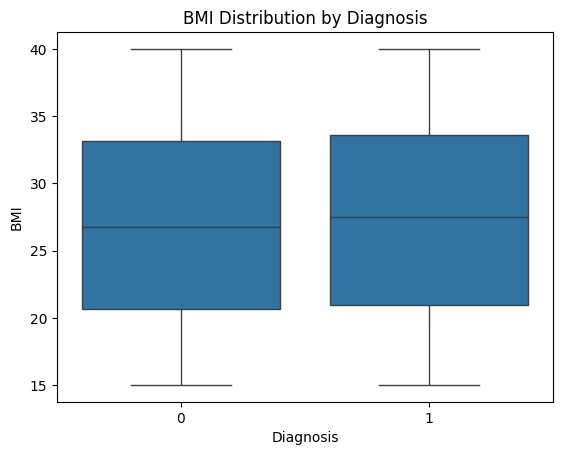

In [7]:
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title("BMI Distribution by Diagnosis")
plt.show()

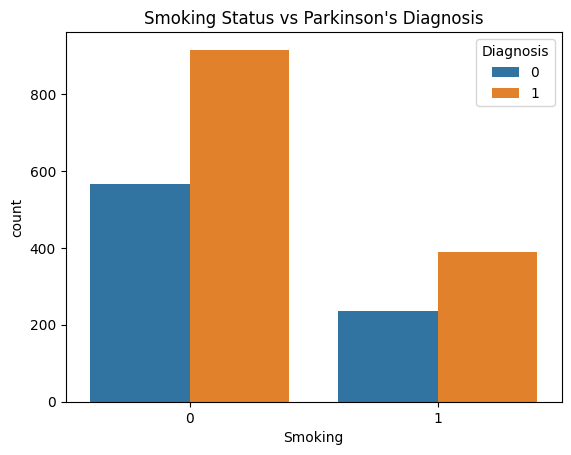

In [8]:
sns.countplot(x='Smoking', hue='Diagnosis', data=df)
plt.title("Smoking Status vs Parkinson's Diagnosis")
plt.show()

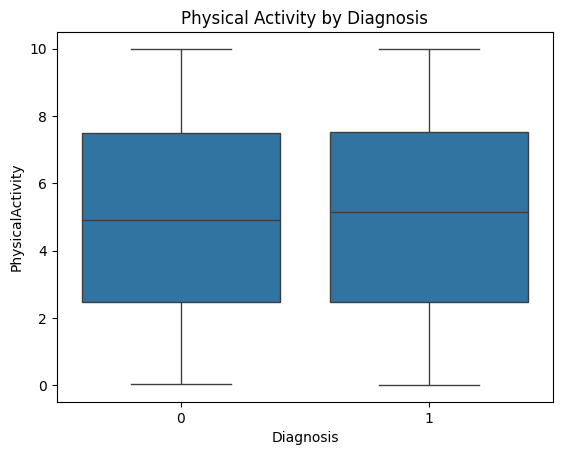

In [9]:
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title("Physical Activity by Diagnosis")
plt.show()

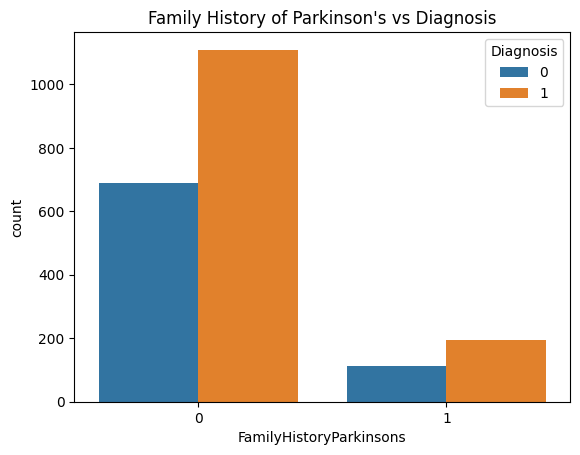

In [10]:
sns.countplot(x='FamilyHistoryParkinsons', hue='Diagnosis', data=df)
plt.title("Family History of Parkinson's vs Diagnosis")
plt.show()

#ML model

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Encode Categorical Variables
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Ethnicity'] = label_enc.fit_transform(df['Ethnicity'])
df['EducationLevel'] = label_enc.fit_transform(df['EducationLevel'])

In [13]:
# Feature Selection (Symptoms, Family History, Cognitive, etc.)
features = ['Age', 'Gender', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
            'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity',
            'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders',
            'Constipation']

X = df[features]
y = df['Diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9168646080760094

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       150
           1       0.95      0.92      0.93       271

    accuracy                           0.92       421
   macro avg       0.91      0.92      0.91       421
weighted avg       0.92      0.92      0.92       421



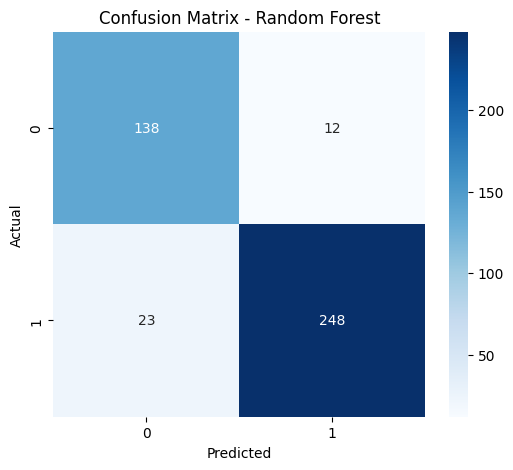

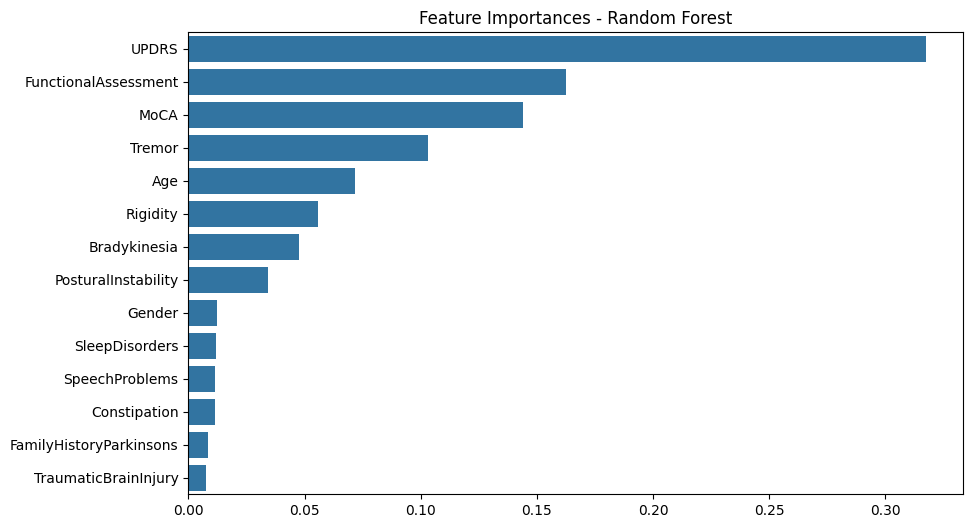

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance Plot
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(features)[sorted_idx])
plt.title("Feature Importances - Random Forest")
plt.show()

In [16]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


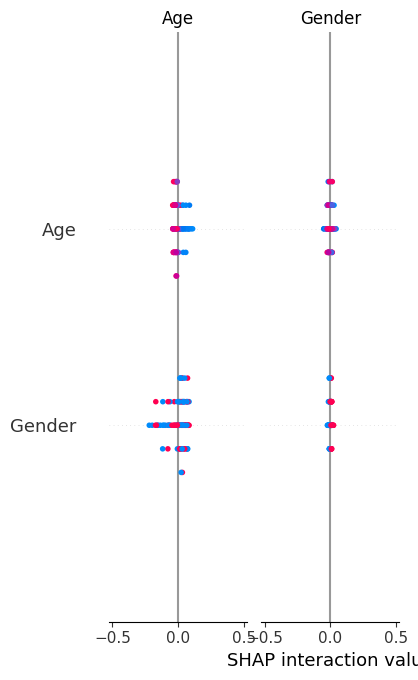

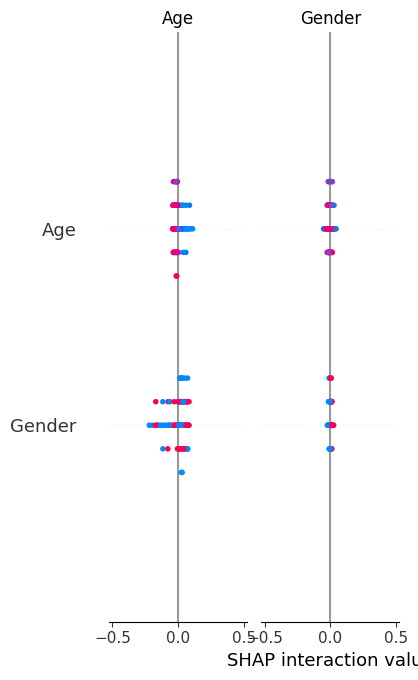

In [17]:
import shap

# Use shap.Explainer() → works reliably for classification problems
explainer = shap.Explainer(rf_model, X_train)

# Calculate SHAP values on a sample
X_sample = X_test.sample(100, random_state=42)
shap_values = explainer(X_sample)

# Plot → Bar Summary Plot (Overall Feature Importance)
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# Plot → Detailed Summary Plot (Violin)
shap.summary_plot(shap_values, X_sample)

In [18]:
print(X_train.columns)

Index(['Age', 'Gender', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity',
       'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
       'SleepDisorders', 'Constipation'],
      dtype='object')


In [19]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [20]:
print(X_train.columns.tolist())  # <--- Save this output somewhere

['Age', 'Gender', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']
